# Customer Segmentation using Clustering

In todays competitive world every business is facing intense competetion and companies are using many innovative stategies to stay on top of the ladder, In case if they dont do so thay may have to face extinction. 

Marketing is also not an exception to this rapid and fast changing competetive environment, Companies are designing and implementing many innovative maketing strategies to increas their sales and reducing the efforts and marketing budgets there by adding value to the organisation. 

By doing a tarket marketing any company can focus on a speciied st of customers who have the capability and need to buy things there by resucing the unnecessary marketing effort and budget and increasing the sales. Analytics comes to thei resuue now. 

By harnessing various analytics capabilites it is possible to segemnt the customeres in to differernt segments which we can use to run campaigns, do cold calling and also to target various other marketing and sales activities. 

For any marketing professional it is crucial to understand customer bahaviour and categorise customers based on their demography and buying behaviour. This is broadly one aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

Today we will learn the concept of segmentation of a customer dataset from an e-commerce site using k-means clustering in python. The dataset contains the annual income of approximately 300 customers and the amount they spend annually on an e-commerce web site. We will use the kmeans and the hierarchical clustering algorithms to derive the optimum number of clusters and understand the underlying customer segments based on the data provided. 

The dataset consists of Annual income in dollars and their total spend in dollars on an e-commerce web site for a period of one year. We will explore the data using numpy and pandas libraries in python.

#### Load the required libraries for data exploration and plotting 
#### Numpy and Pandas for data eploration 
#### Matplotlib and Seabon for Plotting graphs 

In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

#### Read the dataset from the location : Please make sure the location of the code and the data is same here

In [2]:
dataset=pd.read_csv('CLV.csv')

In [3]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
len(dataset) # of rows

303

In [5]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


The dataset consists of 303 rows. The mean annual income is $245000 and the mean annual spend is $149000. The distribution of the annual income and annual spend has been illustrated with a distplot and violinplot.

/home/shyam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shyam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income / spend')

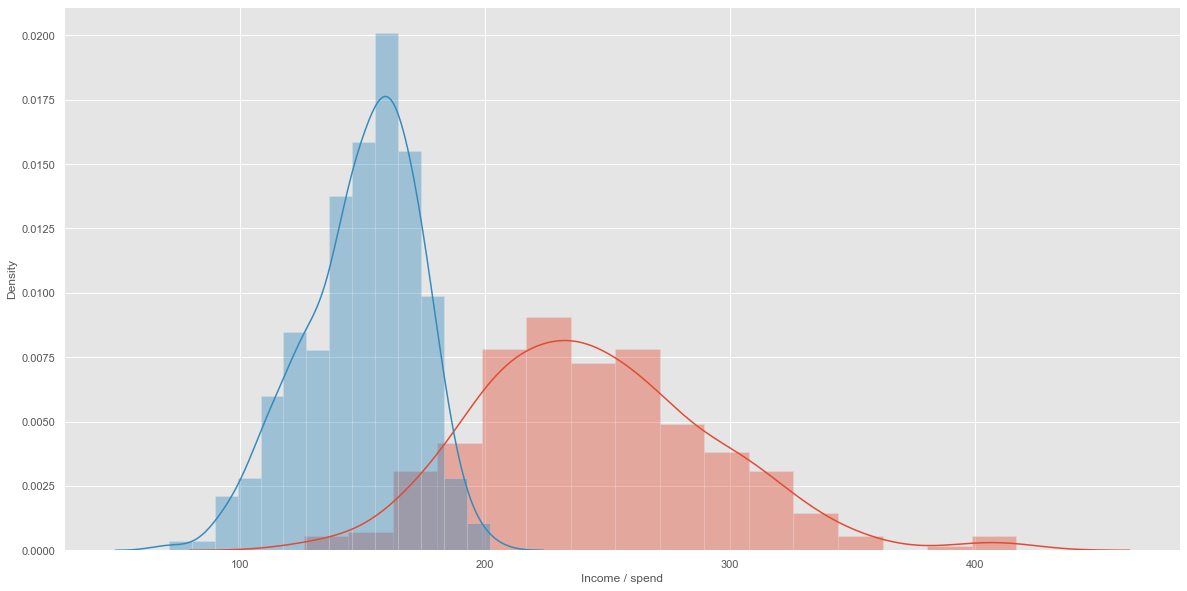

In [6]:
#Visualising the data
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

[(0.0, 420.0)]

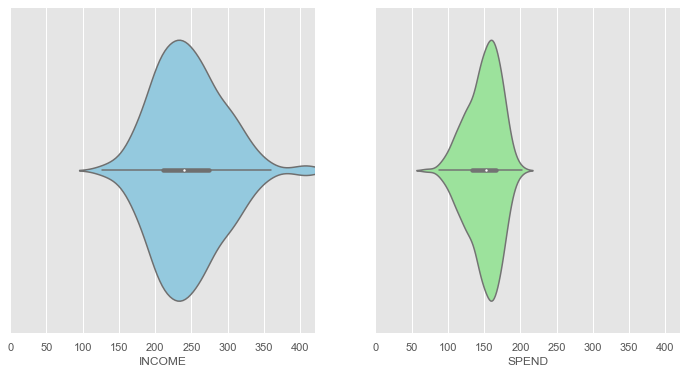

In [7]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

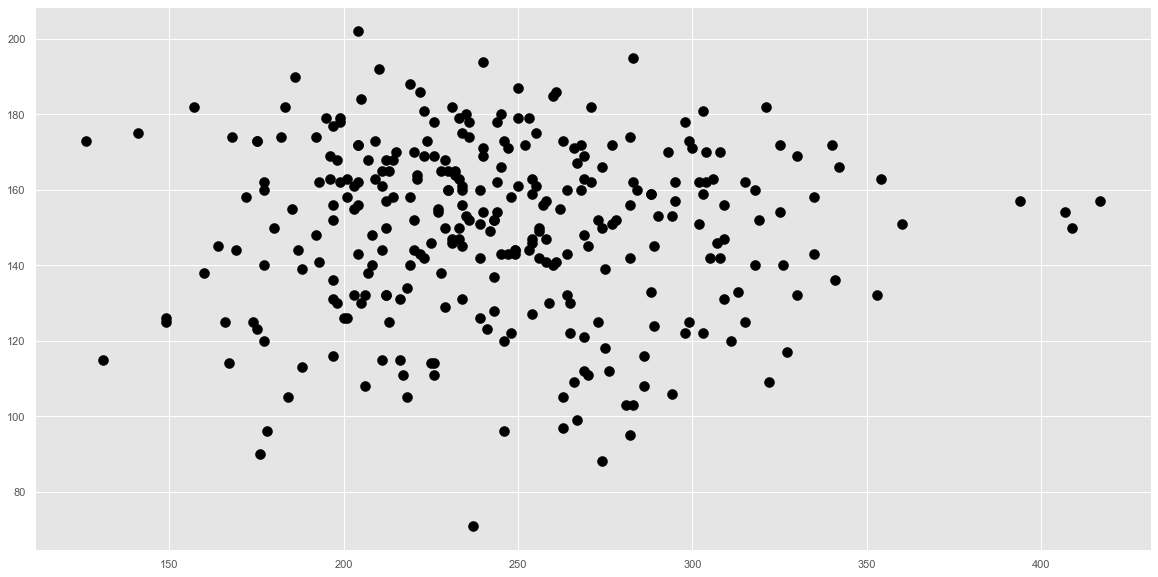

In [8]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

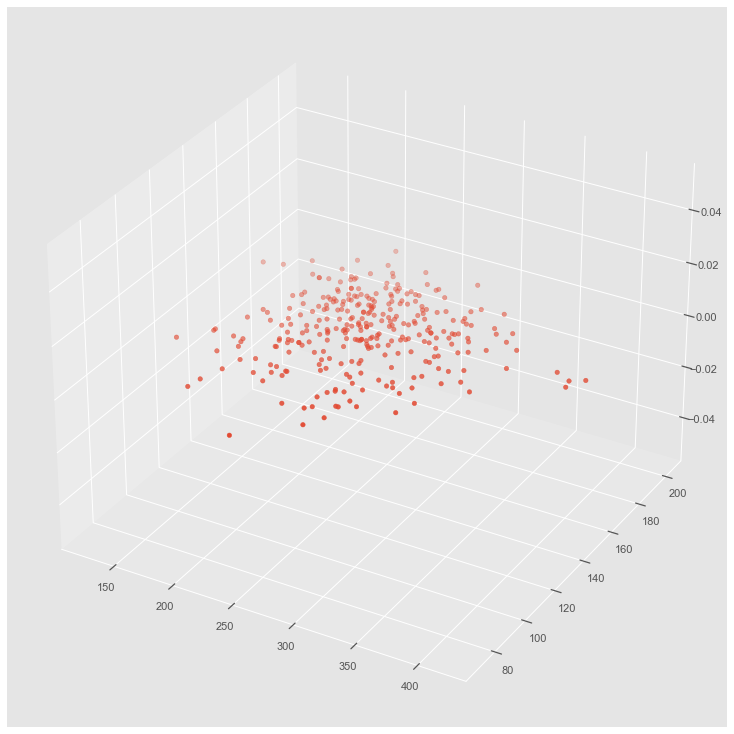

In [9]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

## Clustering fundamentals

In [10]:
X=dataset.iloc[:,[0,1]].values

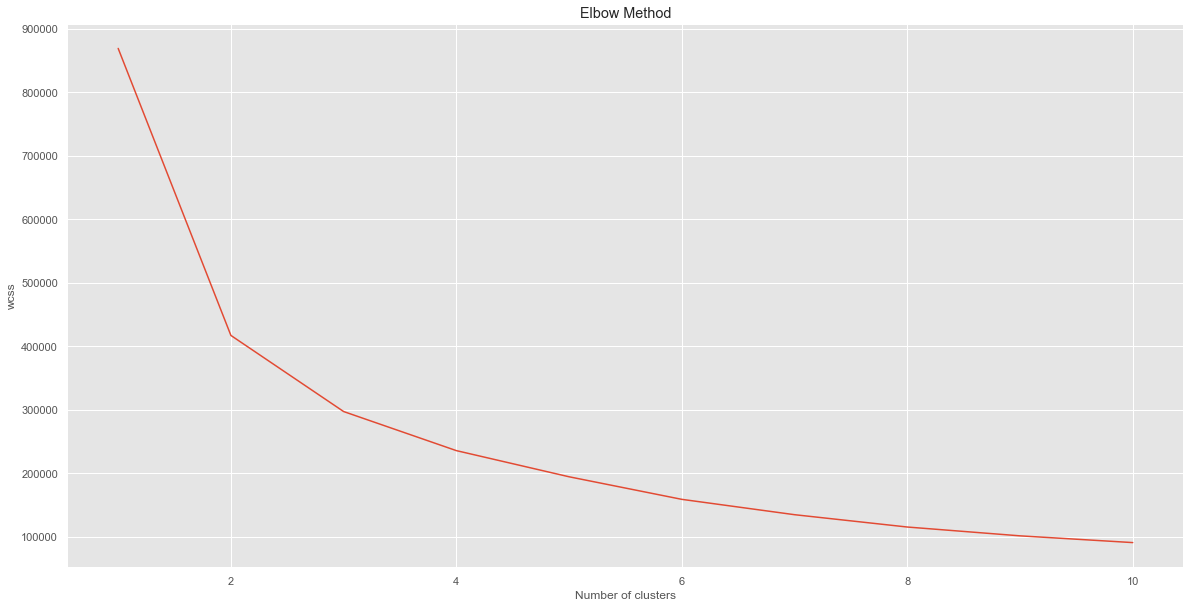

In [11]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [12]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.34983136755282396
For n_clusters=5, The Silhouette Coefficient is 0.36165764606767004
For n_clusters=6, The Silhouette Coefficient is 0.37011984242696244
For n_clusters=7, The Silhouette Coefficient is 0.36117971937538385
For n_clusters=8, The Silhouette Coefficient is 0.3537845305549209
For n_clusters=9, The Silhouette Coefficient is 0.35874452925758954
For n_clusters=10, The Silhouette Coefficient is 0.3510676802772683


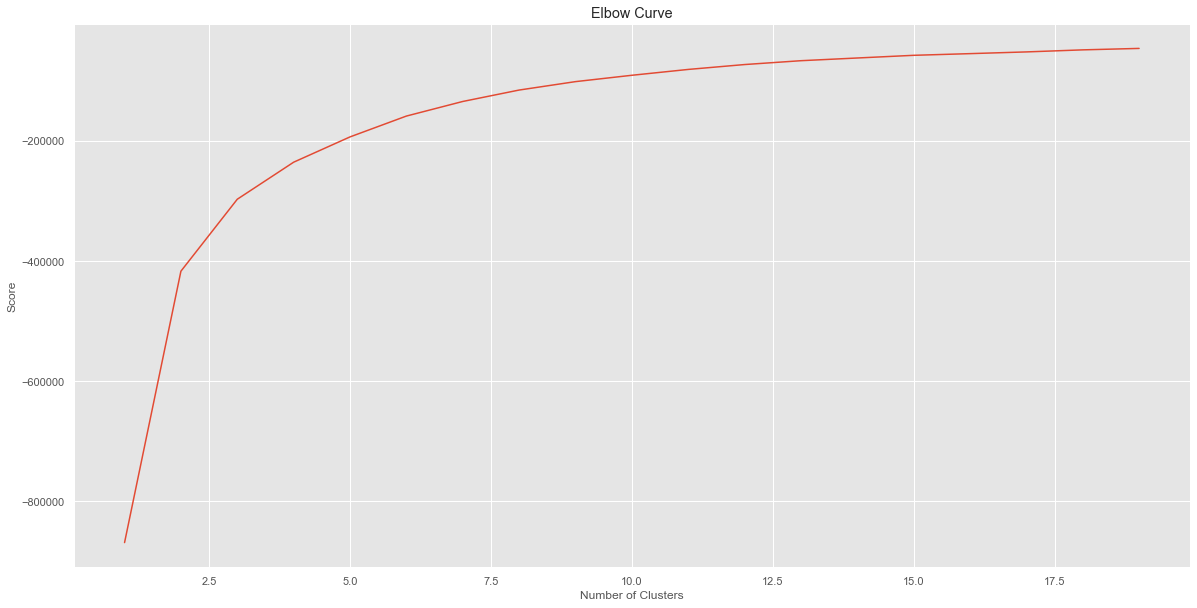

[-868805.4785478542, -416914.6776446208, -297101.37642019405, -235435.61549707604, -193333.51167275637, -158630.56943204784, -134339.9501377763, -115315.00592485754, -101289.24590143634, -90718.93705691851, -80979.31684766359, -72853.64971829977, -66445.18945779167, -61935.79549851593, -57475.79170427611, -54679.86808077226, -51810.36633695327, -48394.78280378461, -45974.53498863447]


In [13]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [14]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478542
k: 2  cost: 416914.67764462077
k: 3  cost: 297101.37642019405
k: 4  cost: 235568.75630353525
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160055
k: 7  cost: 135314.10167803385
k: 8  cost: 115686.57935998777
k: 9  cost: 102546.93727877038
k: 10  cost: 91556.28599714937



In [15]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

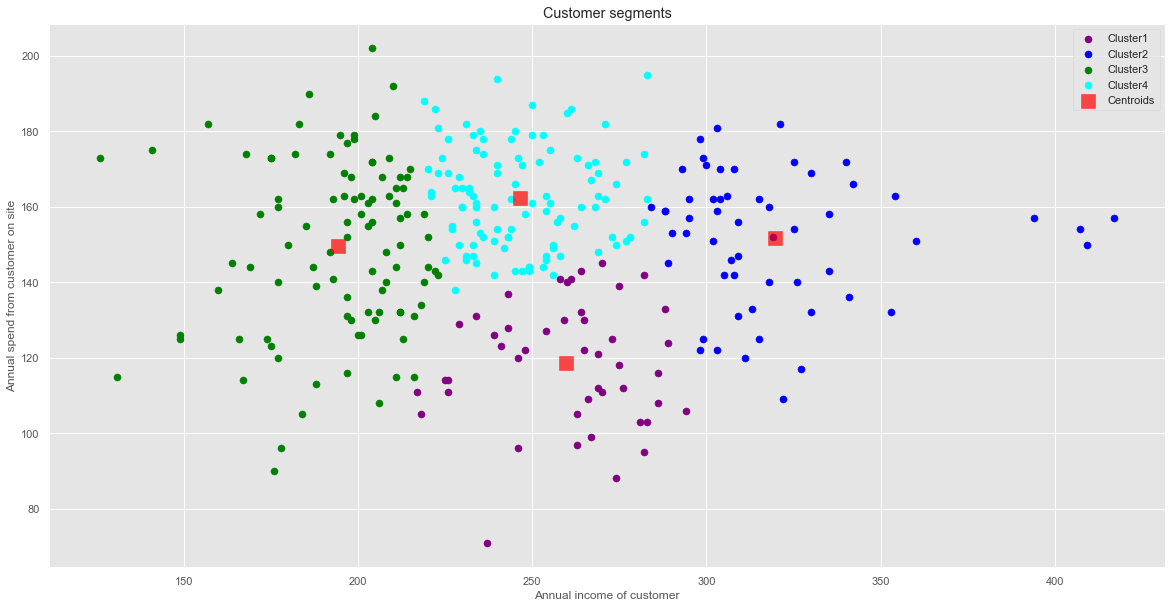

In [16]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

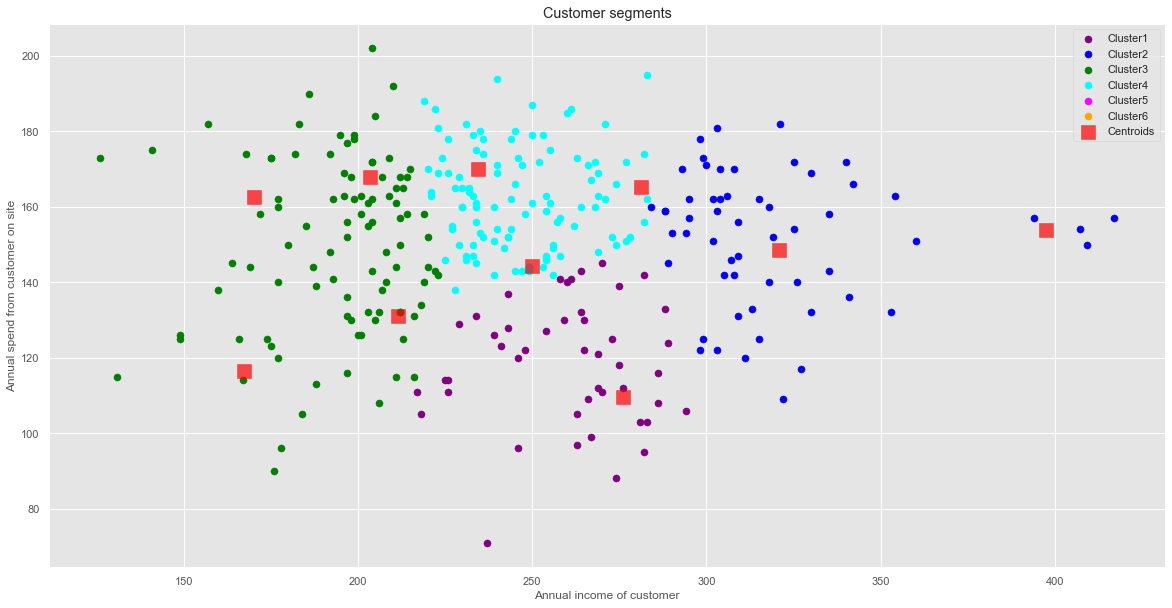

In [17]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

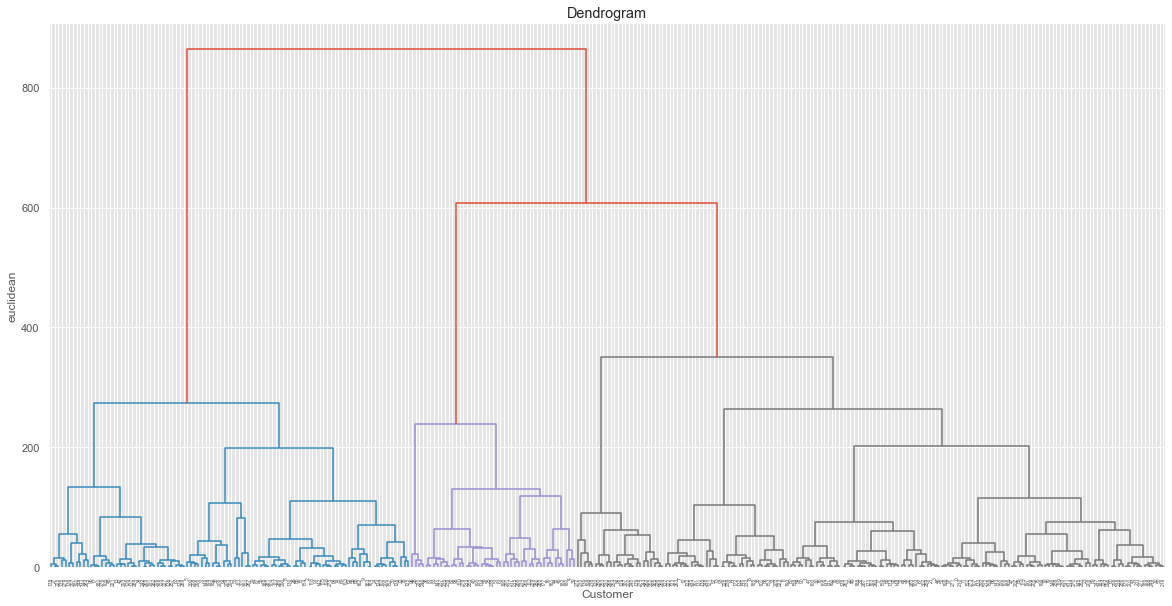

In [18]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [19]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

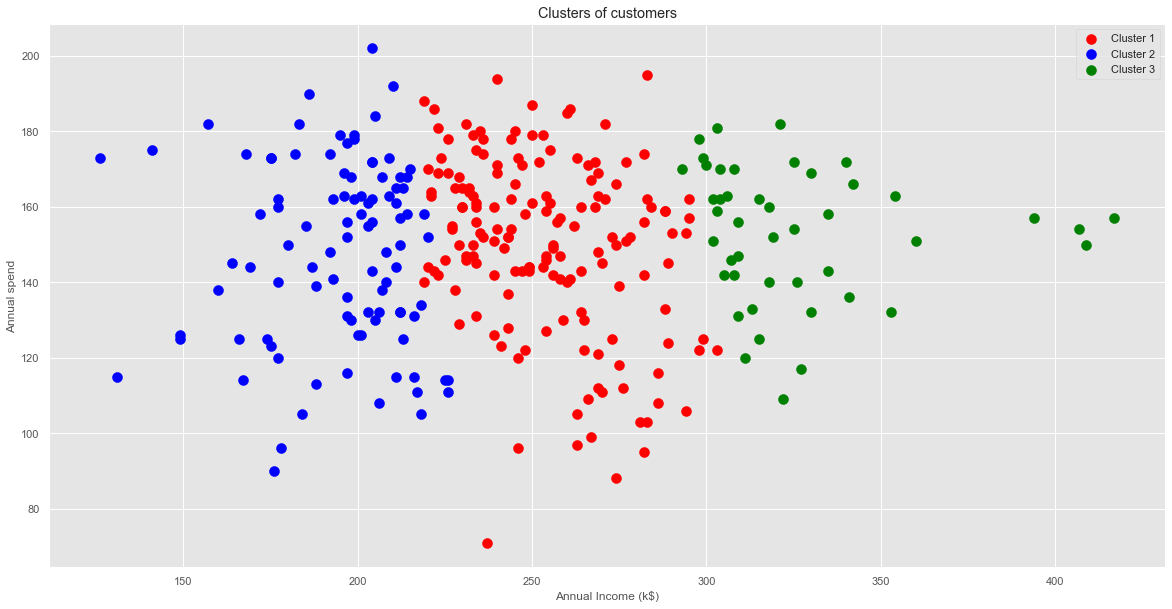

In [20]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [21]:
##Grouping by cluster
dataset.append('y_hc')
grouped_cluster= dataset.groupby('y_hc')
grouped_cluster['INCOME'].count()

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [ ]:
y_hc